# [ Abandoned land analysis with ST_LUCAS system ] 

-------------------------------------------------------------------------------------------------------------------
Lukáš Brodský lukas.brodsky@natur.cuni.cz 
<br>
Department of Applied Geoinformatics and Cartography, Faculty of Science,  Charles University 


### Python API
See https://geoforall.fsv.cvut.cz/st_lucas/api/
<br>
And tutorials here https://geoforall.fsv.cvut.cz/st_lucas/api/tutorials.html 

### ST_LUCAS Python packgae installation 
Linux/ Unix: `$ pip install st_lucas`
<br>
Windows:   `> pip install st_lucas`

### The use case 
This Jupyter Notebook demonstrate use case om abandoned land analysis with ST_LUCAS system, specifically the `Python API`. 
<br> <br>
**Task**: send a request to ST_LUCAS and analyse the LUCAS points with attribute `lu1_h` equal to `U4**` (Semi-natural and natural areas not in use) and analyse the abandoned land results by countries. 
<br> <br>
See the list of attributes https://geoforall.fsv.cvut.cz/st_lucas/tables/list_of_attributes.html and coding tables https://geoforall.fsv.cvut.cz/st_lucas/tables/coding/lu1_h.html
<br> 

EURO STAT classification guidelines: https://ec.europa.eu/eurostat/documents/205002/8072634/LUCAS2018-C3-Classification.pdf 
<br>

In particular: 

* U411 Abandoned industrial areas

* U412 Abandoned commercial areas

* U413 Abandoned transport areas

* U414 Abandoned residential areas

* U415 Other abandoned areas


In [54]:
# IMPORTS
from st_lucas import LucasRequest
from st_lucas import LucasIO 
import requests
from IPython.display import Image

In [55]:
# CLASSES
request = LucasRequest()
lucasio = LucasIO()

In [56]:
# STAPTIAL FILTER 
request.countries = ['CZ']

In [57]:
# TEMPORAL FILTER
request.years = [2018]

In [58]:
# THEMATIC FILTER
request.group = 'LC_LU'



    CO - Copernicus;

    FO - Forestry;

    IN - INSPIRE;

    LC_LU - Land cover, Land use;

    LC_LU_SO - Land cover, Land use, Soil]


In [59]:
# DOWNLOAD DATA
lucasio.download(request)

2023-05-30 12:18:50,267 - root - WARNING - __init__.getSRS - Requested srsName 'EPSG:3035' is not declared as being allowed for requested typename 'lucas:lucas_points_lc_lu'. Options are: 'urn:x-ogc:def:crs:EPSG:3035'.
2023-05-30 12:18:51,109 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 16427kb


In [60]:
# SAVE THE DATA
# lucasio.to_gpkg('sample.gpkg')

In [61]:
# TO GEOPANDAS
gpd_cz = lucasio.to_geopandas()
gpd_cz.head()

,point_id,nuts0,nuts1,nuts2,nuts3,survey_date,car_latitude,car_longitude,car_ew,gps_proj,...,photo_point,photo_north,photo_east,photo_south,photo_west,crop_residues,transect,ex_ante,survey_year,geometry
0,48462894,CZ,CZ0,CZ06,CZ064,2018-05-15,48.928761,17.175367,1,1,...,1,1,1,1,1,2,None,0,2018,POINT (4845999.938 2894003.572)
1,46142892,CZ,CZ0,CZ03,CZ031,2018-07-18,49.069319,14.011057,1,1,...,1,1,1,1,1,2,None,0,2018,POINT (4614000.337 2891999.157)
2,48042992,CZ,CZ0,CZ05,CZ053,2018-06-22,49.840966,16.724575,1,1,...,1,1,1,1,1,1,None,0,2018,POINT (4804000.378 2991999.535)
3,46142990,CZ,CZ0,CZ02,CZ020,2018-08-13,49.948833,14.080428,1,1,...,1,1,1,1,1,2,None,0,2018,POINT (4613999.413 2989999.524)
4,46582898,CZ,CZ0,CZ03,CZ031,2018-07-23,49.099955,14.616137,1,1,...,1,1,1,1,1,-1,None,0,2018,POINT (4657999.519 2897999.834)


In [62]:
# ATRIBUTES
gpd_cz.columns

Index(['point_id', 'nuts0', 'nuts1', 'nuts2', 'nuts3', 'survey_date',
       'car_latitude', 'car_longitude', 'car_ew', 'gps_proj', 'gps_prec',
       'gps_lat', 'gps_long', 'gps_altitude', 'th_lat', 'th_long',
       'dist_thr_grid', 'obs_dist', 'obs_direct', 'obs_type', 'obs_radius',
       'lc1', 'lc1_h', 'lc1_h_l3_missing', 'lc1_h_l3_missing_level',
       'lc1_spec', 'lc1_perc', 'lc1_perc_cls', 'lc2', 'lc2_h',
       'lc2_h_l3_missing', 'lc2_h_l3_missing_level', 'lc2_spec', 'lc2_perc',
       'lc2_perc_cls', 'lu1', 'lu1_h', 'lu1_type', 'lu1_perc', 'lu1_perc_cls',
       'lu2', 'lu2_h', 'lu2_type', 'lu2_perc', 'lu2_perc_cls',
       'parcel_area_ha', 'feature_width', 'lm_plough_slope',
       'lm_plough_direct', 'lm_stone_walls', 'lm_grass_margins',
       'eunis_complex', 'grassland_sample', 'grass_cando', 'grazing', 'wm',
       'wm_source', 'wm_type', 'wm_delivery', 'office_pi', 'pi_extension',
       'lndmng_plough', 'special_status', 'lc_lu_special_remark',
       'photo_point

In [64]:
print(f'There are {gpd_cz.shape[0]} LUCAS points in the selected country.')

There are 5713 LUCAS points in the selected country.


## 1. Land Cover

<AxesSubplot:ylabel='lc1_l1'>

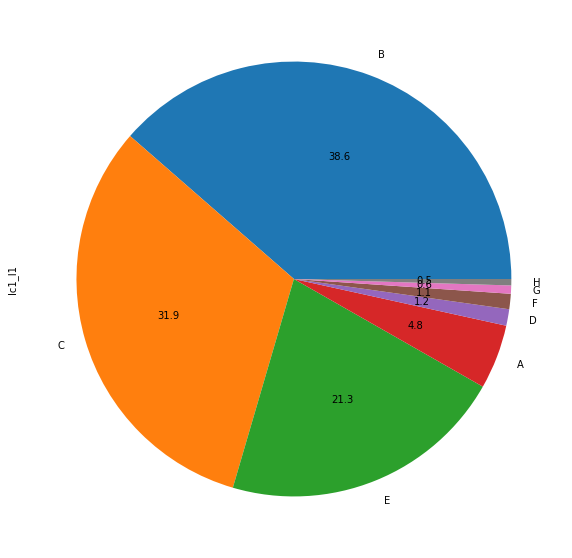

In [65]:
gpd_cz['lc1_l1'] = gpd_cz['lc1'].str.slice(0,1)
gpd_cz['lc1_l1'].value_counts().plot.pie(figsize=(10, 10), autopct="%.1f")

### LUCAS Land Cover legend
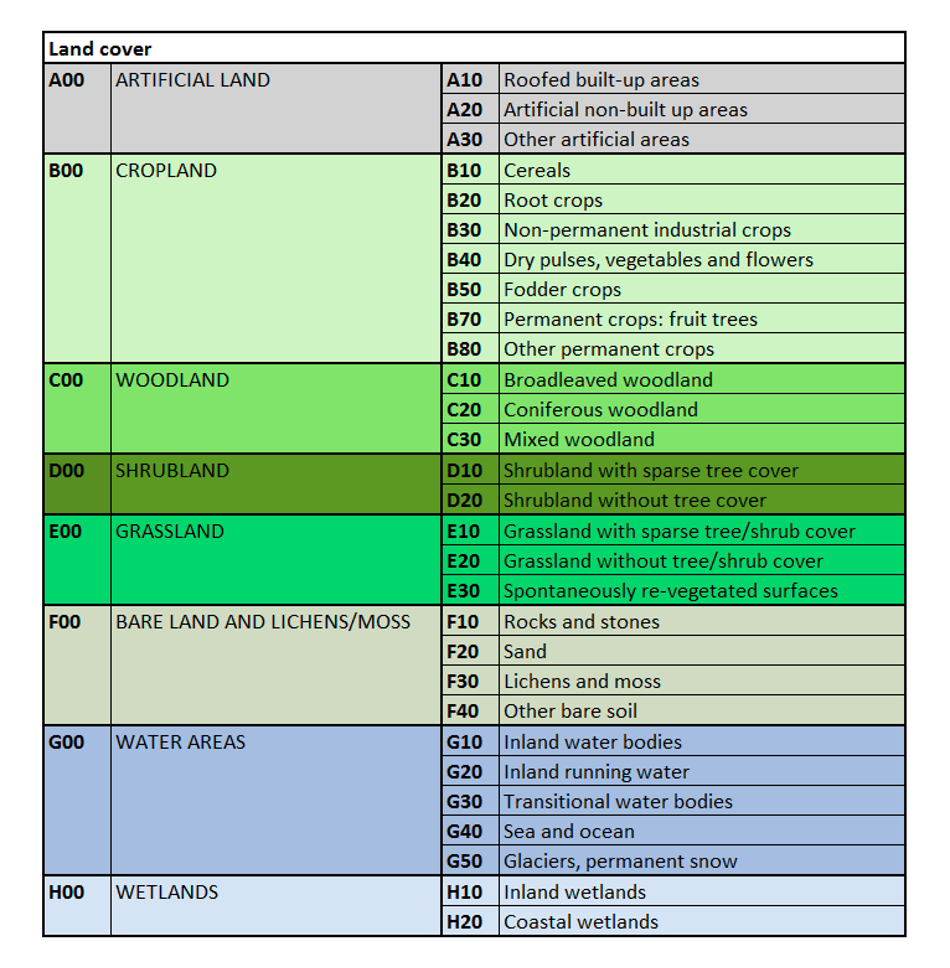

## 2. Land Use

<AxesSubplot:ylabel='lu1_l1'>

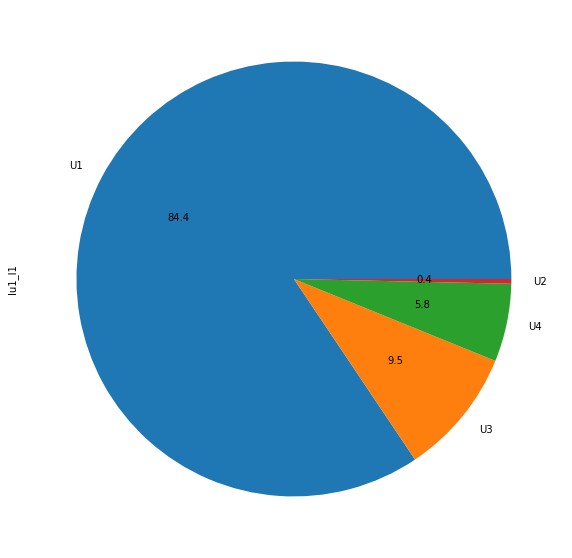

In [66]:
gpd_cz['lu1_l1'] = gpd_cz['lu1'].str.slice(0,2)
gpd_cz['lu1_l1'].value_counts().plot.pie(figsize=(10, 10), autopct="%.1f")

### LUCAS Land Use legend
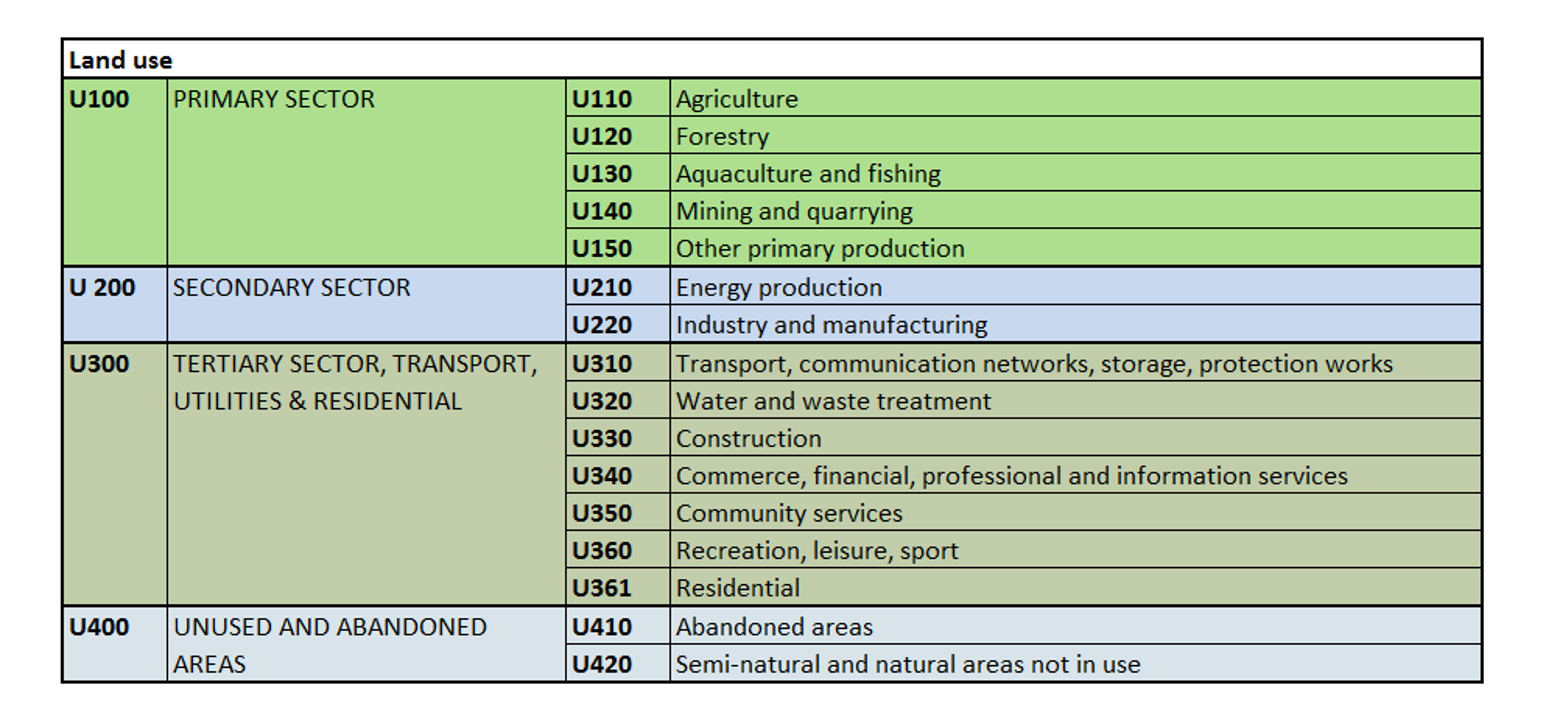

### ABANDONED AREAS (LUCAS 3rd-level)

* U411 Abandoned industrial areas

* U412 Abandoned commercial areas

* U413 Abandoned transport areas

* U414 Abandoned residential areas

* U415 Other abandoned areas

[Text(0, 0, '301'),
 Text(0, 0, '23'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

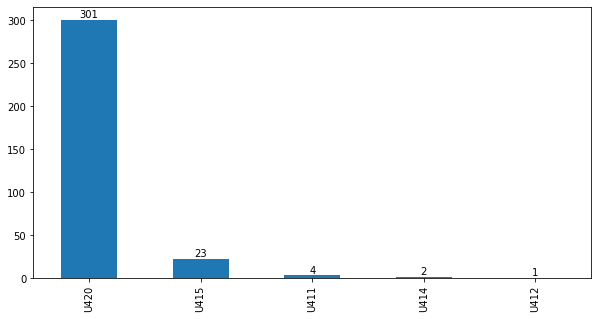

In [67]:
# U4**
gpd_cz['lu1_l3'] = gpd_cz['lu1'].str.slice(0,4)
# gpd_cz['lu1_l3'][gpd_cz['lu1_l1'] == 'U4'].value_counts().plot.bar(figsize=(10, 5))

ax = gpd_cz['lu1_l3'][gpd_cz['lu1_l1'] == 'U4'].value_counts().plot.bar(figsize=(10, 5))
ax.bar_label(ax.containers[0])

In [68]:
# U412 
lu_class = 'U412'
gpd_cz[gpd_cz['lu1_h'] == lu_class].shape

(1, 77)

In [69]:

gpd_cz[gpd_cz['lu1_h'] == lu_class][['point_id', 'lc1_h', 'lu1_h']]

,point_id,lc1_h,lu1_h
5306,45942900,E30,U412


### LUCAS photo

In [70]:
id = gpd_cz[gpd_cz['lu1_h'] == lu_class]['point_id']
images = lucasio.get_images(2018, id.item())
print(images)

{'P': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/459/429/45942900P.jpg', 'S': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/459/429/45942900S.jpg', 'N': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/459/429/45942900N.jpg', 'E': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/459/429/45942900E.jpg', 'W': 'https://gisco-services.ec.europa.eu/lucas/photos/2018/CZ/459/429/45942900W.jpg'}


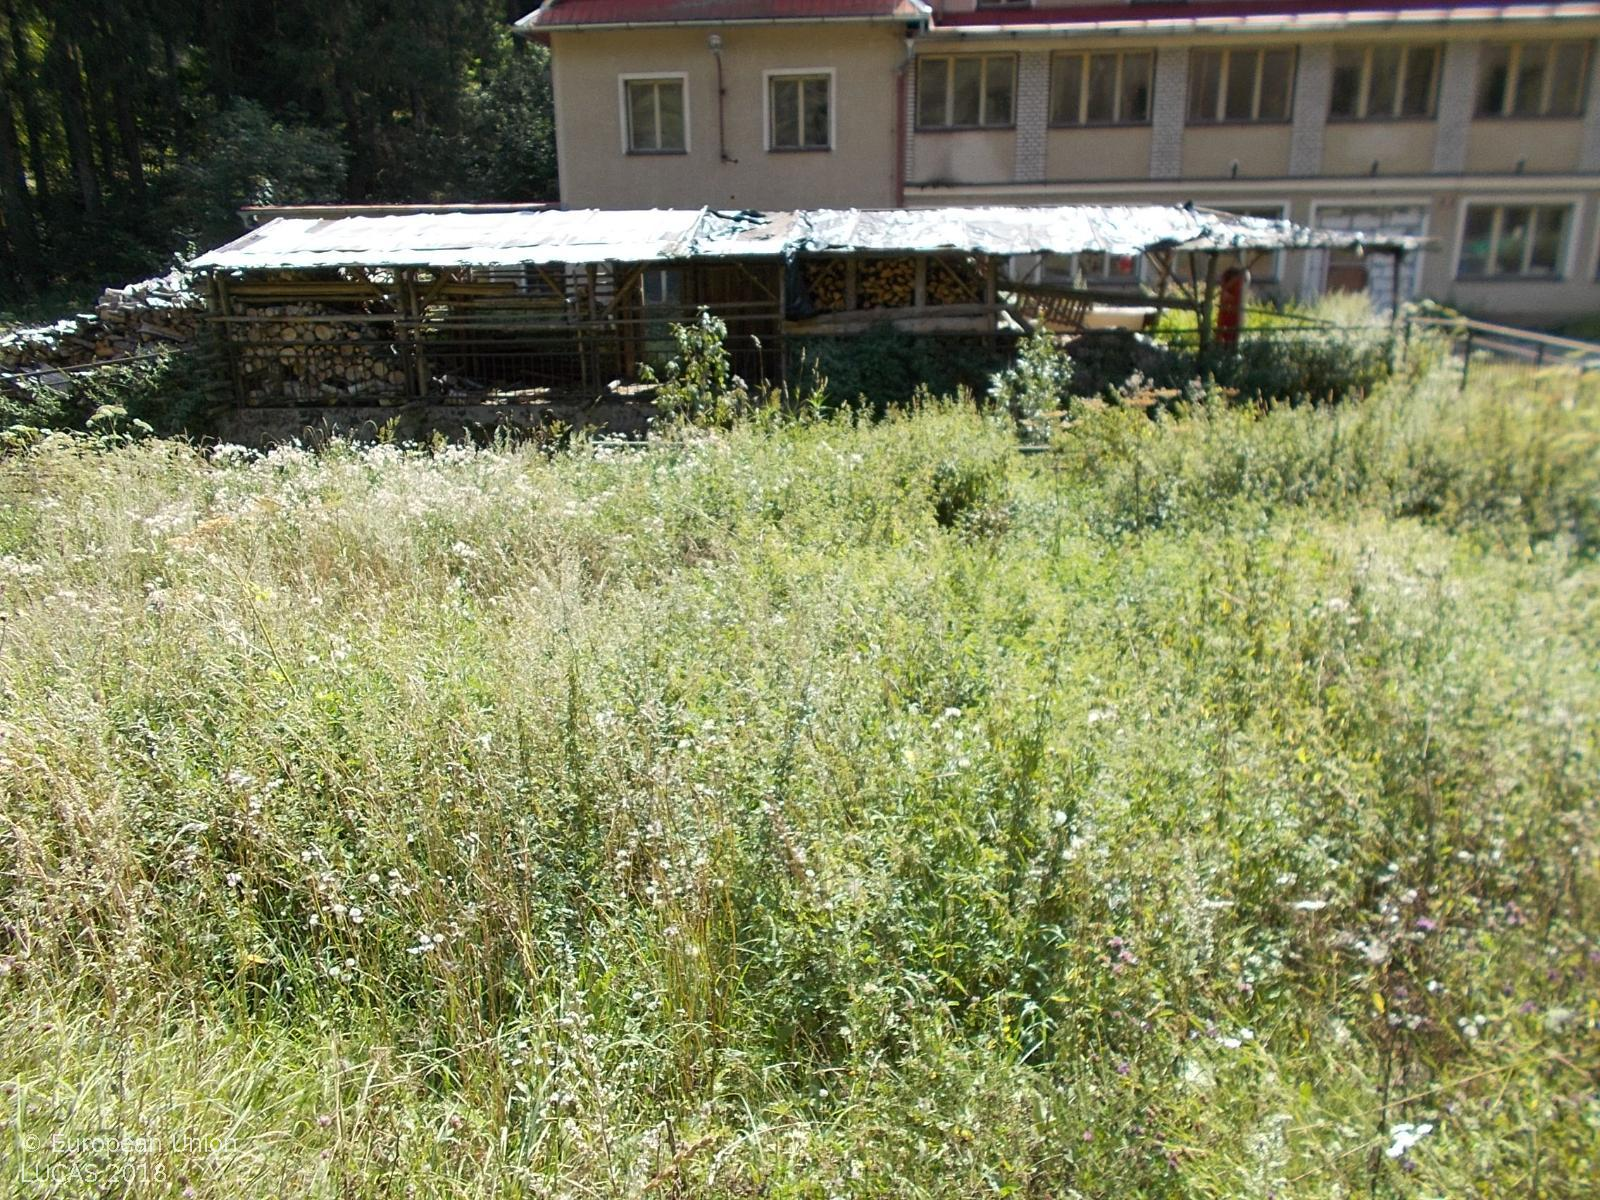

In [71]:
r = requests.get(images["P"])
Image(r.content)

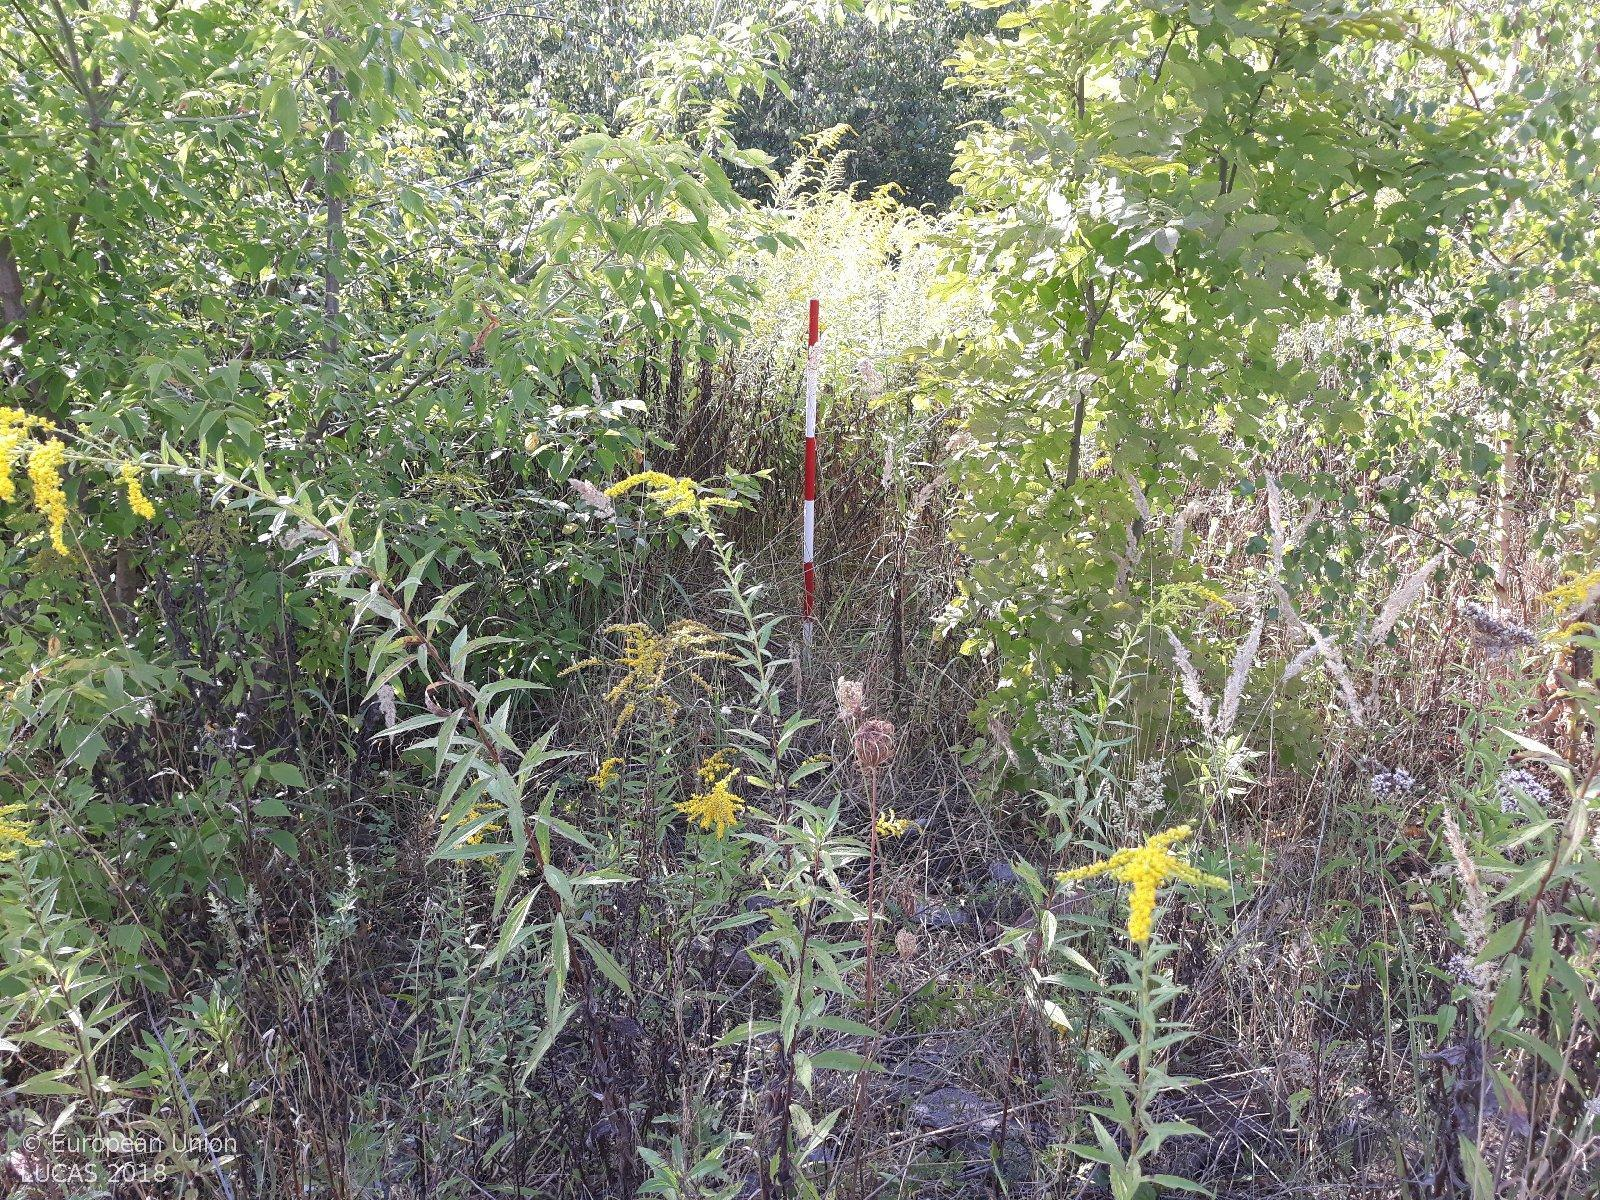

In [72]:
lu_class = 'U411'
ids = gpd_cz[gpd_cz['lu1_h'] == lu_class]['point_id']
id = ids.values[0]
images = lucasio.get_images(2018, id.item())
r = requests.get(images["P"])
Image(r.content)

### Abandoned land analysis per country 

In [73]:
# selected countries 
countries = ['CZ', 'SK', 'DE', 'IT', 'PL']
countries

['CZ', 'SK', 'DE', 'IT', 'PL']

In [74]:
# EU countries 
eu_countries = ['BE', 'BG',  'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'UK']
len(eu_countries)

28

In [75]:
request = LucasRequest()
request.countries = eu_countries # countries
request.years = [2018]
request.group = 'LC_LU'

In [76]:
# Beaware download of all countries may take long! 
lucasio.download(request)
gpd = lucasio.to_geopandas()

2023-05-30 12:20:28,889 - root - WARNING - __init__.getSRS - Requested srsName 'EPSG:3035' is not declared as being allowed for requested typename 'lucas:lucas_points_lc_lu'. Options are: 'urn:x-ogc:def:crs:EPSG:3035'.
2023-05-30 12:21:07,369 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 853034kb


In [77]:
gpd.shape

(300000, 74)

In [78]:
# gpd.columns

In [79]:
# LUCAS points by country 
gpd.groupby(['nuts0'])['nuts0'].count()

nuts0
AT     7429
BE     3146
BG     7286
CY     2044
CZ     5374
DE    24499
DK     3350
EE     2251
EL    11528
ES    40742
FI    13343
FR    44101
HR     3878
HU     5147
IE     4198
IT    24746
LT     4200
LU      317
LV     4817
MT       58
NL     4179
PL    21443
PT     6410
RO    15375
SE    21384
SI     1795
SK     2678
UK    14282
Name: nuts0, dtype: int64

In [82]:
abandoned = ['420', '411', '412', '413', '414', '415']

searchabandoned = '|'.join(abandoned)
gpd[gpd['lu1_h'].str.contains(searchabandoned)].shape

(33239, 74)

[Text(0, 0, '292'),
 Text(0, 0, '116'),
 Text(0, 0, '935'),
 Text(0, 0, '982'),
 Text(0, 0, '293'),
 Text(0, 0, '567'),
 Text(0, 0, '157'),
 Text(0, 0, '153'),
 Text(0, 0, '2771'),
 Text(0, 0, '10086'),
 Text(0, 0, '823'),
 Text(0, 0, '2312'),
 Text(0, 0, '1263'),
 Text(0, 0, '278'),
 Text(0, 0, '449'),
 Text(0, 0, '5046'),
 Text(0, 0, '221'),
 Text(0, 0, '5'),
 Text(0, 0, '407'),
 Text(0, 0, '21'),
 Text(0, 0, '158'),
 Text(0, 0, '1110'),
 Text(0, 0, '517'),
 Text(0, 0, '680'),
 Text(0, 0, '1918'),
 Text(0, 0, '100'),
 Text(0, 0, '218'),
 Text(0, 0, '1361')]

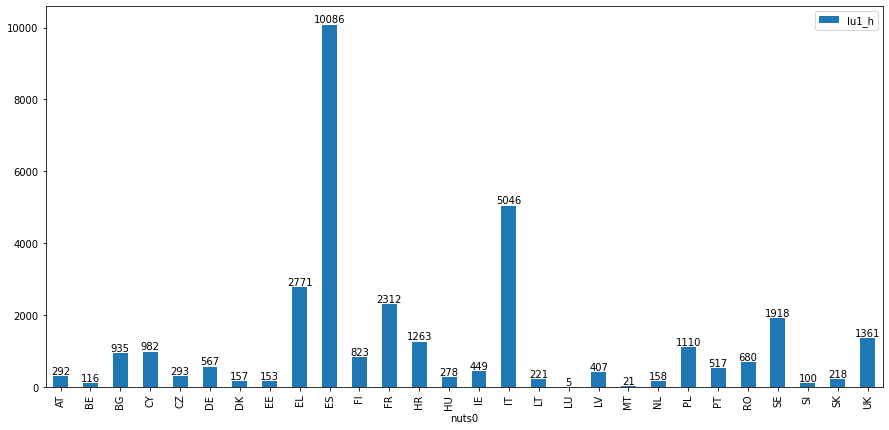

In [83]:
df = gpd[gpd['lu1_h'].str.contains(searchabandoned)][['nuts0', 'lu1_h']].groupby(['nuts0']).count()
ax = df.plot.bar(figsize=(15, 7))
ax.bar_label(ax.containers[0])

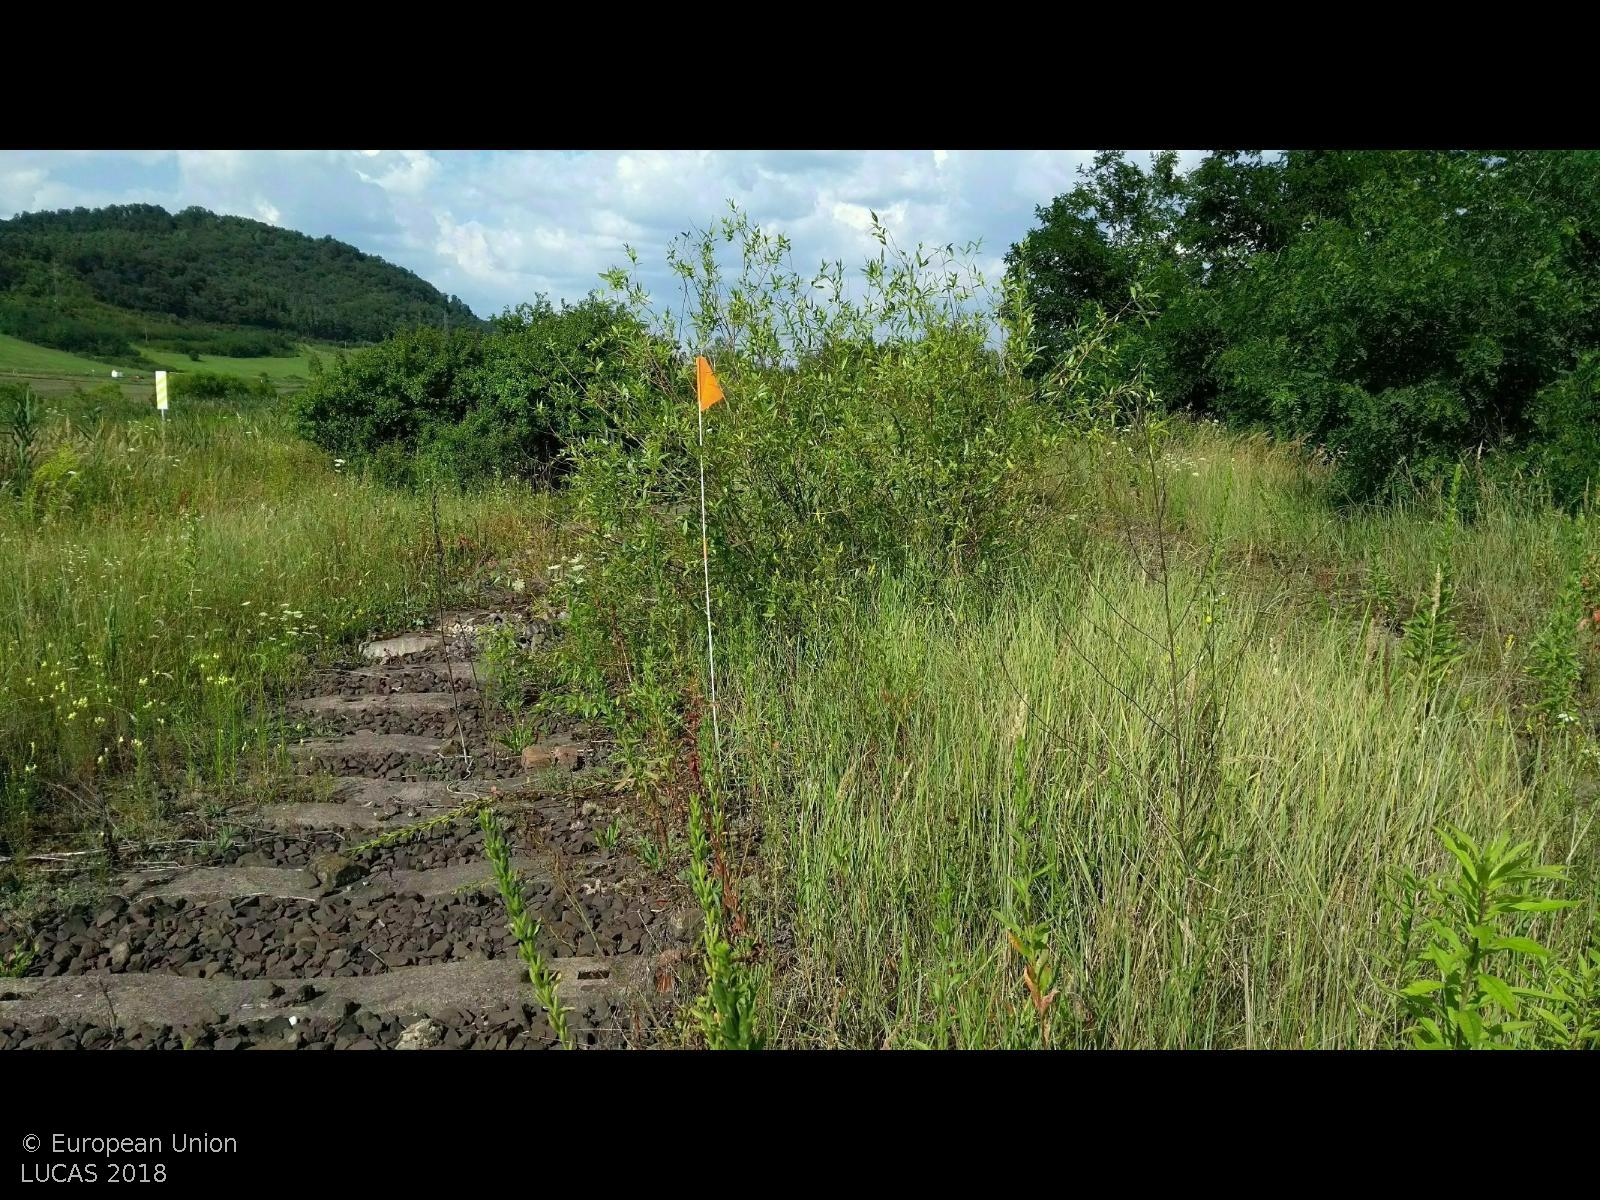

In [92]:
lu_class = 'U411'
ids = gpd[gpd['lu1_h'] == lu_class]['point_id']
id = ids.values[0]
images = lucasio.get_images(2018, id.item())
r = requests.get(images["P"])
Image(r.content)